# Решение кейса для продуктовых аналитиков (лето 2025)

In [1]:
import pandas as pd # Pandas = таблицы и данные
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # исключительно для визуализации графиков
import warnings

# Отключение варнингов - лишние предупреждения
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("kicksharing.csv")

In [3]:
display(df.sample(10)) # показываем первые 6 строк

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
373994,260496551,523105938,M,21,NaN,NaN,NaN,7.99,50.0,300.0,SL,0.045599,2024-07-17 13:07:48.000000,2024-07-17 13:07:52.581446,2024-07-17 13:08:38.984393,3,2024-07-17 13:07:52.581446,0.00,NaN,NaN
236916,254683238,552963489,M,25,GRD,UNM,ЛЕНИНГРАДСКАЯ ОБЛ,5.99,50.0,300.0,SL,1.675123,2024-06-25 17:45:43.000000,2024-06-25 17:45:47.259843,2024-06-25 17:53:20.014694,3,2024-06-25 17:45:47.259843,97.92,9.79,NaN
69793,349685735,68155704,M,50,PGR,MAR,МОСКОВСКАЯ ОБЛ,6.49,50.0,300.0,ES200,3.076102,2024-09-27 04:53:08.000000,2024-09-27 04:53:11.619000,2024-09-27 05:08:53.966505,3,2024-09-27 04:53:11.619000,153.84,44.77,NaN
208189,267393287,156573230,M,48,GRD,MAR,Г МОСКВА,7.49,50.0,300.0,SL,12.757669,2024-08-12 12:29:08.000000,2024-08-12 12:29:12.238495,2024-08-12 13:49:02.462579,3,2024-08-12 12:29:12.238495,649.20,649.20,NaN
36864,254682894,956421124,F,62,NaN,NaN,NaN,5.99,30.0,300.0,Max,0.000000,2024-06-25 11:16:41.000000,2024-06-25 11:16:45.650642,2024-06-25 11:17:47.246209,3,2024-06-25 11:16:45.650642,41.98,4.20,NaN
294632,355730965,766402302,M,34,NaN,UNM,БРЯНСКАЯ ОБЛ,8.29,50.0,300.0,SL,1.058941,2024-10-19 06:35:00.000000,2024-10-19 06:35:03.875000,2024-10-19 06:38:43.686463,3,2024-10-19 06:35:03.875000,83.16,44.94,NaN
356562,266325098,584296830,M,37,UGR,CIV,Г САНКТ-ПЕТЕРБУРГ,6.99,50.0,300.0,SL,10.379537,2024-08-08 11:12:55.000000,2024-08-08 11:12:59.148653,2024-08-08 11:38:48.707117,3,2024-08-08 11:12:59.148653,231.74,34.17,NaN
348690,346863955,941040850,M,25,NaN,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.49,30.0,300.0,E,6.501451,2024-09-17 04:36:28.000000,2024-09-17 04:36:34.335000,2024-09-17 05:00:11.115027,5,2024-09-17 06:36:34.335000,161.76,NaN,47.0
123527,348289643,375493806,M,24,SCH,NaN,КАЛИНИНГРАДСКАЯ ОБЛ,7.49,50.0,300.0,SL,0.004709,2024-09-22 16:13:24.000000,2024-09-22 16:13:29.009000,2024-09-22 16:14:08.460097,2,2024-09-22 15:13:29.009000,0.00,NaN,NaN
39144,351047296,257583020,M,39,PGR,MAR,ЯРОСЛАВСКАЯ ОБЛ,6.49,30.0,300.0,SL,1.885303,2024-10-02 16:22:45.000000,2024-10-02 16:22:49.061000,2024-10-02 16:33:15.722875,3,2024-10-02 16:22:49.061000,101.39,22.28,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [5]:
df.isnull().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

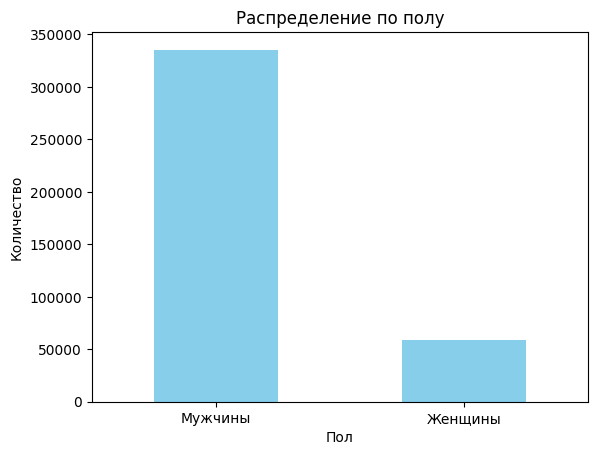

In [ ]:
df['gender_cd'].dropna().value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.title("Распределение по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

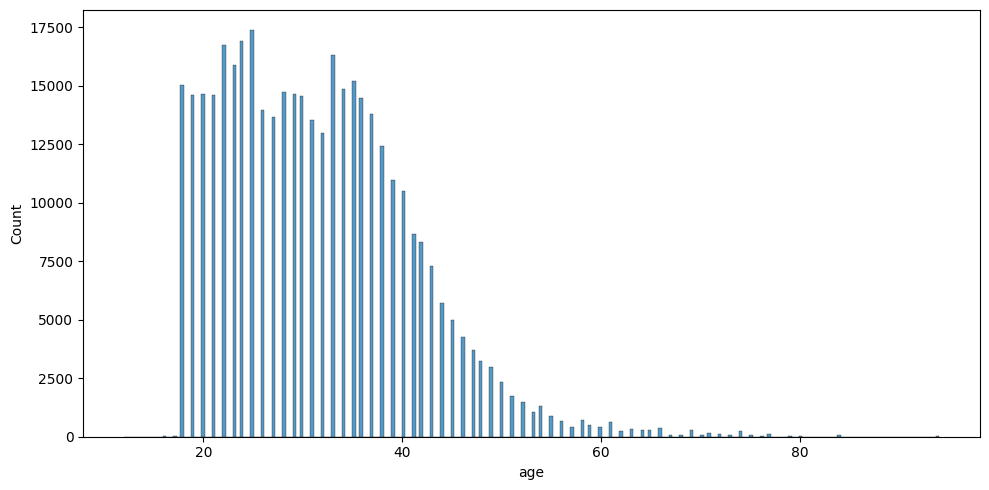

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='age')

plt.tight_layout()
plt.show()

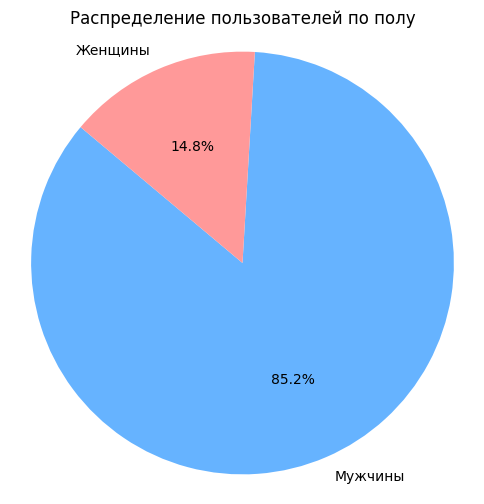

In [ ]:
# Убираем пропущенные значения
gender_counts = df['gender_cd'].dropna().value_counts()
df['gender_cd'] = df['gender_cd'].replace({'M': 'Мужчины', 'F': 'Женщины'})

# Подписи и цвета (по желанию)
labels = gender_counts.index
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Можно адаптировать под твои категории

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Распределение пользователей по полу')
plt.axis('equal')  # Чтобы круг был ровным
plt.show()

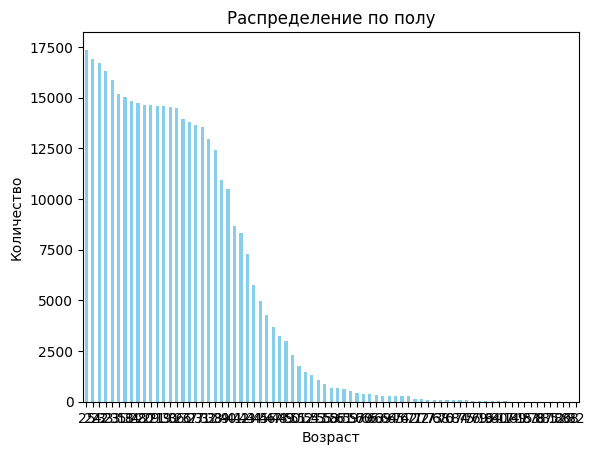

In [ ]:
df['age'].value_counts(dropna=False).plot(kind='bar', color='skyblue')

plt.title("Распределение по полу")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()